In [157]:
# Importamos las librerías a utilizar:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Para un análisis más practico, agruparemos las provincias utilizando el criterio de desarrollo económico y social aplicando algunas modificaciones que optimizan la clasificación teniendo en cuenta el enfoque del análisis.

In [158]:
# Creamos la agrupación de provincias:
noroeste = ['Tucumán', 'Salta', 'Santiago del Estero', 'Jujuy', 'Catamarca', 'La Rioja']
litoral = ['Formosa', 'Chaco', 'Misiones', 'Corrientes', 'Entre Ríos', 'Santa Fe']
cuyo = ['Mendoza', 'San Juan', 'San Luis']
# Agruparemos el Gran Buenos Aires y Córdoba, por una cuestión de semejanza en los indicadores:
gran_ba_cba = ['Buenos Aires', 'Capital Federal', 'Córdoba']
patagonia = ['Neuquén', 'Chubut', 'Tierra Del Fuego', 'Santa Cruz', 'Río Negro', 'La Pampa']

In [159]:
# Cargamos el arhicvo vel_prov.csv y lo almacenamos como un DataFrame en la variable vel_prov:
vel_prov = pd.read_csv('../data/vel_prov_eda.csv')

In [160]:
# Verificamos las primeras filas:
vel_prov.head(3)

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,2,Buenos Aires,157.41
1,2024,2,Capital Federal,233.01
2,2024,2,Catamarca,97.38


En la región patagonia es la zona donde se ve una menor cantidad de velocidad de bajada en Argentina, Teniendo la media más baja. Pero las provincias que representan la menor cantidad son chubut, la pampa, santacruz y tierra del fuego, de acá puede salir un cpi para mejorar la velocidad en el sur

**<h4>Análisis de acceso a internet por hogares</h4>**              

In [161]:
# Cargamos el arhicvo pen_hogar.csv y lo almacenamos como un DataFrame en la variable hog:
hog = pd.read_csv('../data/pen_hogar.csv')

In [162]:
# Verificamos las primeras filas:
hog.head(3)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.84
1,2024,2,Capital Federal,116.37
2,2024,2,Catamarca,68.81


Voy a seleccionar un representante para cada región con el fin de obtener una visión más clara sobre el estado del acceso a internet en diferentes áreas del país. Esto me permitirá analizar la distribución de las conexiones a internet cada 100 hogares, proporcionando un panorama más preciso de la infraestructura de conectividad en cada región.

C:\Users\Julia\AppData\Local\Temp\ipykernel_17980\9056875.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=df_filtrado, hue='Provincia', marker='o', ci=None)


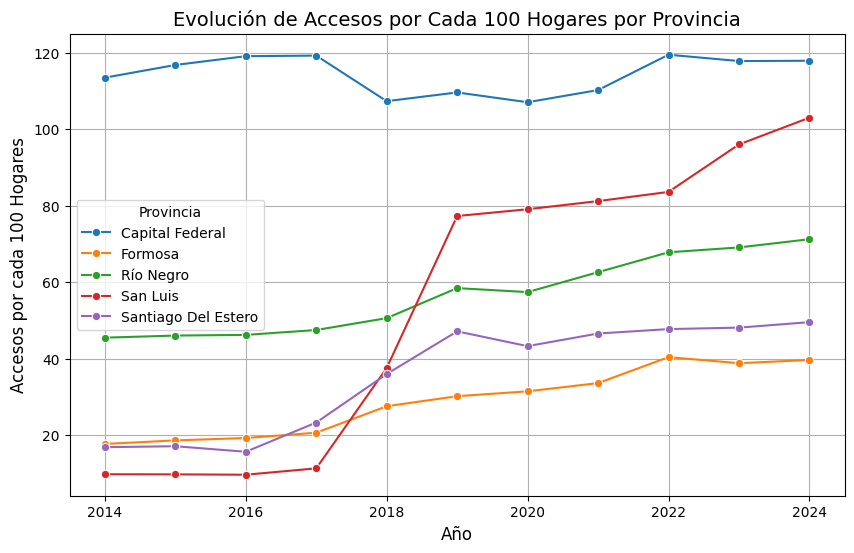

In [163]:
# Filtramos el DataFrame hog con los representantes:
provincias_seleccionadas = ['Santiago Del Estero', 'Formosa', 'San Luis', 'Río Negro', 'Capital Federal']
df_filtrado = hog[hog['Provincia'].isin(provincias_seleccionadas)]

# Configuramos el gráfico y sus parametros:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=df_filtrado, hue='Provincia', marker='o', ci=None)

# Configuramos el título y las etiquetas:
plt.title('Evolución de Accesos por Cada 100 Hogares por Provincia', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Accesos por cada 100 Hogares', fontsize=12)
plt.grid(True)

# Mostramos la leyenda:
plt.legend(title='Provincia')

# Mostramos el gráfico:
plt.show()

Se puede observar una marcada disparidad en el acceso a internet cada 100 hogares entre las diferentes provincias. Algunas de ellas no solo presentan tasas de penetración muy bajas, sino que también muestran un crecimiento mínimo en la cobertura de internet a lo largo del tiempo, lo que refleja desafíos significativos en términos de infraestructura y expansión de la conectividad en esas regiones.

In [164]:
# Filtramos el DataFrame solo para el año 2024:
hog_2024 = hog[hog['Año'] == 2024]

# Calculamos la media de los accesos por cada 100 hogares para 2024:
media_nacional_2024 = hog_2024['Accesos por cada 100 hogares'].mean()

# Calculamos la desviación estándar para el año 2024:
desviacion_estandar_2024 = hog_2024['Accesos por cada 100 hogares'].std()

# Buscamos la provincia con el valor más alto:
provincia_max = hog_2024.loc[hog_2024['Accesos por cada 100 hogares'].idxmax()]

# Buscamos la provincia con el valor más bajo
provincia_min = hog_2024.loc[hog_2024['Accesos por cada 100 hogares'].idxmin()]

# Mostramos los resultados:
print(f'La media nacional de accesos por cada 100 hogares en 2024 es: {media_nacional_2024:.2f}')
print(f'La desviación estándar de los accesos por cada 100 hogares en 2024 es: {desviacion_estandar_2024:.2f}')
print(f'Provincia con el valor más alto en 2024: {provincia_max["Provincia"]} con {provincia_max["Accesos por cada 100 hogares"]:.2f} accesos por cada 100 hogares')
print(f'Provincia con el valor más bajo en 2024: {provincia_min["Provincia"]} con {provincia_min["Accesos por cada 100 hogares"]:.2f} accesos por cada 100 hogares')


La media nacional de accesos por cada 100 hogares en 2024 es: 71.98
La desviación estándar de los accesos por cada 100 hogares en 2024 es: 21.05
Provincia con el valor más alto en 2024: Capital Federal con 119.53 accesos por cada 100 hogares
Provincia con el valor más bajo en 2024: Formosa con 39.61 accesos por cada 100 hogares


Tanto la media como la gran disparidad entre el punto más alto y el más bajo de los accesos a internet cada 100 hogares son representativos de una problemática crítica que requiere atención urgente. Esta disparidad refleja una falta de infraestructura en el país.

En consecuencia, procedemos a crear un KPI cuyo objetivo es aumentar los accesos a internet cada 100 hogares para el trimestre 3 del año 2024 en un 2% para cada provincia. La fórmula que utilizaremos para medir este KPI es la siguiente:

$$
KPI = \left( \frac{\text{Nuevo Acceso} - \text{Acceso Actual}}{\text{Acceso Actual}} \right) \times 100
$$

Esta fórmula calcula el cambio porcentual entre el acceso actual y el nuevo acceso esperado, permitiendo evaluar el progreso hacia el objetivo de crecimiento.

In [165]:
# Filtramos el DataFrame para el año 2024, trimestre 2:
hog_2024_t2 = hog[(hog['Año'] == 2024) & (hog['Trimestre'] == 2)].copy()

# Calculamos el acceso esperado para el próximo trimestre:
hog_2024_t2.loc[:, 'Acceso cada 100 hogares acceso esperado(t3)'] = hog_2024_t2['Accesos por cada 100 hogares'] * 1.02

# Calculamos el incremento de casas necesarias:
hog_2024_t2.loc[:, 'Casas Objetivo'] = hog_2024_t2['Acceso cada 100 hogares acceso esperado(t3)'] - hog_2024_t2['Accesos por cada 100 hogares']

# Redondeamos las columnas numéricas a 2 decimales:
hog_2024_t2[['Acceso cada 100 hogares acceso esperado(t3)', 'Casas Objetivo']] = hog_2024_t2[['Acceso cada 100 hogares acceso esperado(t3)', 'Casas Objetivo']].round(2)

# Renombramos las columnas:
hog_2024_t2.rename(columns={'Accesos por cada 100 hogares': 'Acceso Actual(2024t2)', 
                            'Acceso cada 100 hogares acceso esperado(t3)': 'Acceso esperado(2024t3)'}, inplace=True)

In [166]:
#Cargamos el KPI
hog_2024_t2.to_csv('../kpi/kpi_hog.csv', index=False)

In [ ]:
hog['Accesos por cada 100 hogares'] = hog['Accesos por cada 100 hogares'].round(2)
hog['Accesos por cada 100 hogares'] = hog['Accesos por cada 100 hogares'].apply(lambda x: str(x).replace('.', ','))
hog.to_csv('../data/hog.csv', index=False)

In [170]:
hog_2024_t2

,Año,Trimestre,Provincia,Acceso Actual(2024t2),Acceso esperado(2024t3),Casas Objetivo
0,2024,2,Buenos Aires,79.84,81.44,1.60
1,2024,2,Capital Federal,116.37,118.70,2.33
2,2024,2,Catamarca,68.81,70.19,1.38
3,2024,2,Chaco,44.06,44.94,0.88
4,2024,2,Chubut,86.33,88.06,1.73
5,2024,2,Córdoba,90.79,92.61,1.82
6,2024,2,Corrientes,51.38,52.41,1.03
7,2024,2,Entre Ríos,68.64,70.01,1.37
8,2024,2,Formosa,39.69,40.48,0.79
9,2024,2,Jujuy,58.30,59.47,1.17


**<h4>Análisis de la Velocidad de Internet: Media en Mbps</h4>**              

Generamos un gráfico general que incluye todas las provincias para visualizar el crecimiento anual de la media de velocidad de Internet en cada una de ellas.

C:\Users\Julia\AppData\Local\Temp\ipykernel_17980\3477423284.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Año', y='Mbps (Media de bajada)', data=vel_prov, hue='Provincia', ci=None)


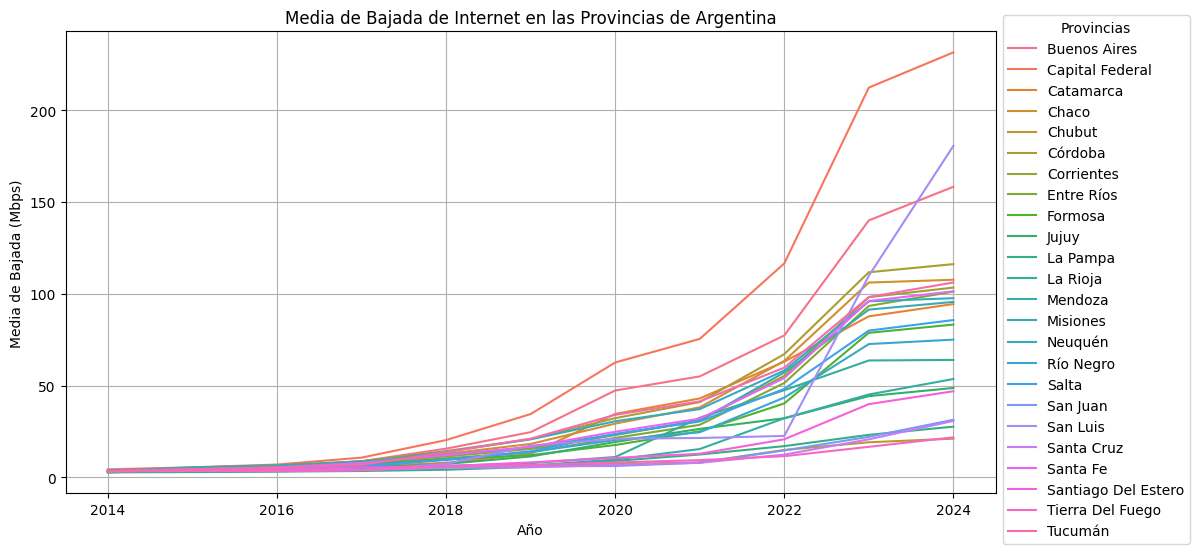

In [171]:
# Definimos el tamaño de la visualización
plt.figure(figsize=(12, 6))

# Definimos el tipo de grafico a utilizar y los parametros sobre los cuales se generará el mismo:
sns.lineplot(x='Año', y='Mbps (Media de bajada)', data=vel_prov, hue='Provincia', ci=None)

# Configuramos los títulos:
plt.title('Media de Bajada de Internet en las Provincias de Argentina')
plt.xlabel('Año')
plt.ylabel('Media de Bajada (Mbps)')

# Configuraramos el panel con la guía de coles y nombres:
plt.legend(title='Provincias', bbox_to_anchor=(1, 1.05))

# Mantenemos el grid:
plt.grid(True)

# Mostramos: el gráfico
plt.show()

Procedemos a visualizar la **media** y la **desviación estándar** de la **velocidad en mbps** más actuales en Argentina

In [172]:
# Creamos el DataFrame que contiene las apariciones más actuales:
vel_arg_2t_2024 = vel_prov[(vel_prov['Año'] == 2024) & (vel_prov['Trimestre'] == 2)]

# Calcular el promedio de la velocidad de bajada (Mbps) en ese trimestre
prom_vel_arg= vel_arg_2t_2024['Mbps (Media de bajada)'].mean()
std_vel_arg = vel_arg_2t_2024['Mbps (Media de bajada)'].std()

# Mostrar el resultado
print(f'El promedio de la velocidad el último trimestre de 2024 en Argentina es de: {prom_vel_arg} Mbps')
print(f'La desvíacion estandar es de {std_vel_arg}')

El promedio de la velocidad el último trimestre de 2024 en Argentina es de: 87.58750000000002 Mbps
La desvíacion estandar es de 51.38735974249259


Como primera inferencia podemos señalar que la mayoría de las provincias experimentaron un crecimiento en la velocidad del internet. Sin embargo, se observa que hay una marcada disparidad en cuanto al crecimiento: algunas provincias alcanzaron velocidades diez veces mayores que otras, mientras que en otras el aumento fue poco significativo.


Ahora procedemos a hacer un analisis por región:

**<h4>Capital Federal, Buenos Aires y Córdobas</h4>**

C:\Users\Julia\AppData\Local\Temp\ipykernel_17980\2099979345.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Año', y='Mbps (Media de bajada)', data=vel_gran_ba_cba, hue='Provincia', ci=None, color='green')


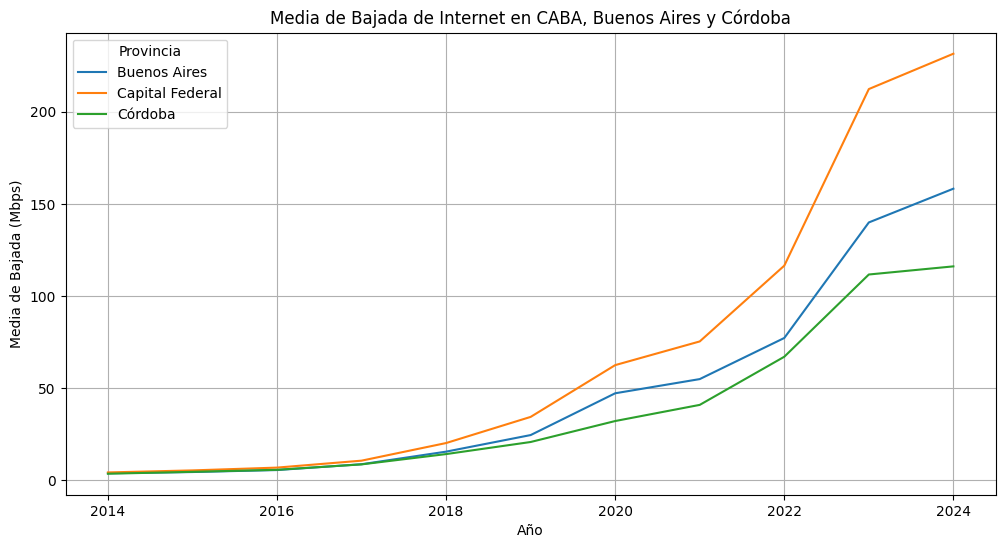

In [173]:
# Creamos un DataFrame incluyendo solamente las apariciones de la agrupación gran_ba_cba:
vel_gran_ba_cba = vel_prov[vel_prov['Provincia'].isin(gran_ba_cba)]

# Definimos el tamaño de la visualización:
plt.figure(figsize=(12, 6))

# Definimos el tipo de grafico a utilizar y los parametros sobre los cuales se generará el mismo:
sns.lineplot(x='Año', y='Mbps (Media de bajada)', data=vel_gran_ba_cba, hue='Provincia', ci=None, color='green')

# Configuraramos el panel con la guía de colores y nombres:
plt.legend(title='Provincia', labels=gran_ba_cba)

# Configuramos los títulos:
plt.title('Media de Bajada de Internet en CABA, Buenos Aires y Córdoba')
plt.xlabel('Año')
plt.ylabel('Media de Bajada (Mbps)')

# Mantenemos el grid:
plt.grid(True)

# Mostramos el gráfico
plt.show()

In [174]:
# Creamos el DataFrame que contiene las apariciones más actuales para gran_ba_cba:
vel_gran_ba_cba_2t_2024 = vel_gran_ba_cba[(vel_gran_ba_cba['Año'] == 2024) & (vel_gran_ba_cba['Trimestre'] == 2)]

# Calculamos el promedio y la desviación estándar de la velocidad de bajada (Mbps) más actuales:
prom_vel_gran_ba_cba = vel_gran_ba_cba_2t_2024['Mbps (Media de bajada)'].mean()
std_vel_gran_ba_cba = vel_gran_ba_cba_2t_2024['Mbps (Media de bajada)'].std()

# Mostramos los resultados
print(f'El promedio de la velocidad el último trimestre de 2024 para CABA, Buenos Aires y Córdoba es de: {prom_vel_gran_ba_cba} Mbps')
print(f'Y su desvíacion estandar de {std_vel_gran_ba_cba}')

El promedio de la velocidad el último trimestre de 2024 para CABA, Buenos Aires y Córdoba es de: 169.26999999999998 Mbps
Y su desvíacion estandar de 58.715337008314954


Si bien **Capital Federal** presenta la media de velocidad más alta del país, lo que la convierte en un outlier, tanto **Buenos Aires** como **Córdoba** mantienen un crecimiento constante y se posicionan por encima de la media nacional.

**<h4>Región de Cuyo</h4>**

C:\Users\Julia\AppData\Local\Temp\ipykernel_17980\452377254.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Año', y='Mbps (Media de bajada)', data=vel_cuyo, hue='Provincia', ci=None, color='green')


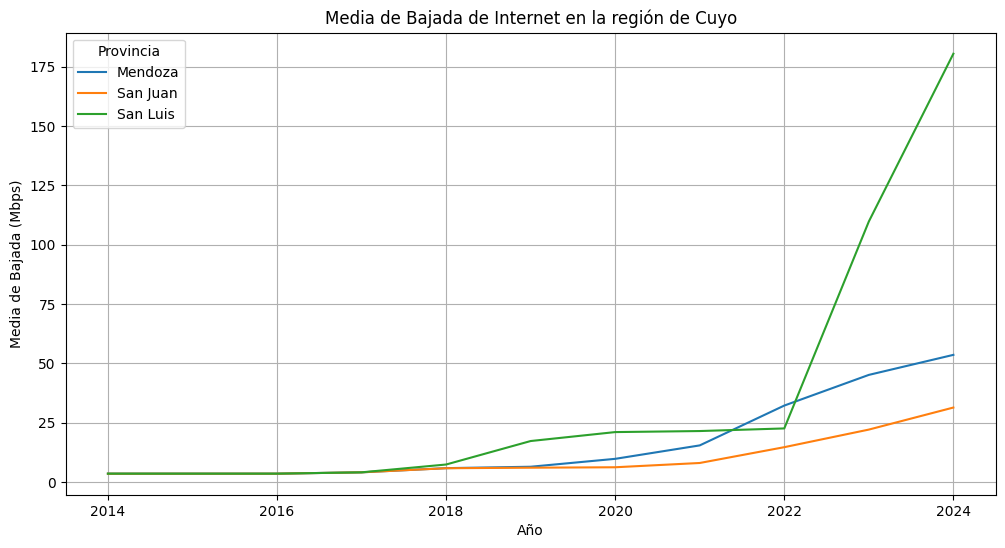

In [175]:
# Creamos un DataFrame incluyendo solamente las apariciones de la agrupación cuyo:
vel_cuyo = vel_prov[vel_prov['Provincia'].isin(cuyo)]

# Definimos el tamaño de la visualización:
plt.figure(figsize=(12, 6))

# Definimos el tipo de grafico a utilizar y los parametros sobre los cuales se generará el mismo:
sns.lineplot(x='Año', y='Mbps (Media de bajada)', data=vel_cuyo, hue='Provincia', ci=None, color='green')

# Configuraramos el panel con la guía de colores y nombres:
plt.legend(title='Provincia', labels=cuyo)

# Configuramos los títulos:
plt.title('Media de Bajada de Internet en la región de Cuyo')
plt.xlabel('Año')
plt.ylabel('Media de Bajada (Mbps)')

# Mantenemos el grid:
plt.grid(True)

# Mostramos el gráfico
plt.show()

In [176]:
# Creamos el DataFrame que contiene las apariciones más actuales para cuyo:
vel_cuyo_2t_2024 = vel_cuyo[(vel_cuyo['Año'] == 2024) & (vel_cuyo['Trimestre'] == 2)]

# Calculamos el promedio y la desviación estándar de la velocidad de bajada (Mbps) más actuales:
prom_vel_cuyo = vel_cuyo_2t_2024['Mbps (Media de bajada)'].mean()
std_vel_cuyo = vel_cuyo_2t_2024['Mbps (Media de bajada)'].std()

# Mostramos los resultados
print(f'El promedio de la velocidad el último trimestre de 2024 para la región de Cuyo: {prom_vel_cuyo} Mbps')
print(f'Y su desvíacion estandar de {std_vel_cuyo}')

El promedio de la velocidad el último trimestre de 2024 para la región de Cuyo: 89.7 Mbps
Y su desvíacion estandar de 80.4336167283307


Al igual que **Capital Federal**, **San Luis** representa un outlier tanto para la región de **Cuyo** como para Argentina en general. En contraste, **San Juan** y **Mendoza** se encuentran por debajo de la media nacional.

**<h4>Región del Litoral</h4>**

C:\Users\Julia\AppData\Local\Temp\ipykernel_17980\4260216771.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Año', y='Mbps (Media de bajada)', data=vel_litoral, hue='Provincia', ci=None, color='green')


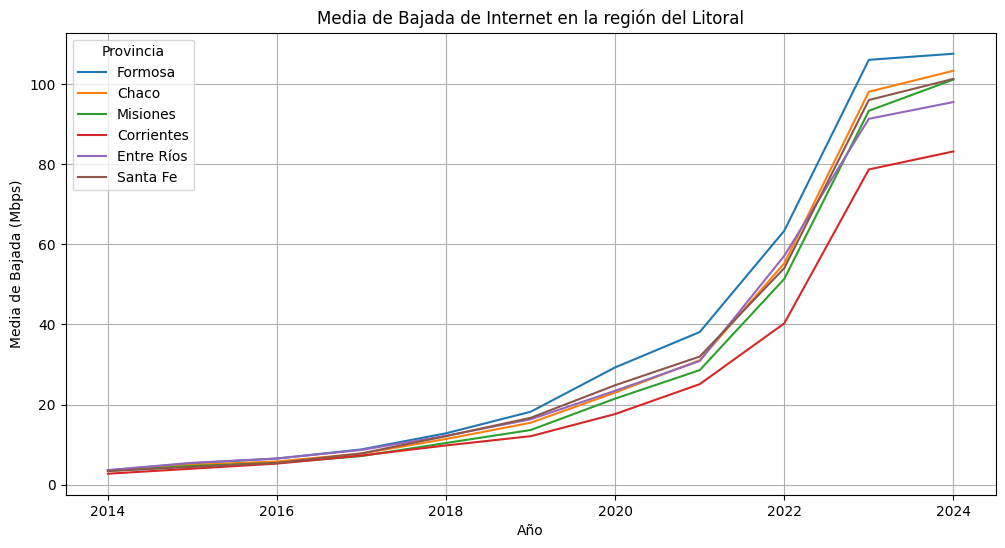

In [177]:
# Creamos un DataFrame incluyendo solamente las apariciones de la agrupación litoral:
vel_litoral = vel_prov[vel_prov['Provincia'].isin(litoral)]

# Definimos el tamaño de la visualización:
plt.figure(figsize=(12, 6))

# Definimos el tipo de grafico a utilizar y los parametros sobre los cuales se generará el mismo:
sns.lineplot(x='Año', y='Mbps (Media de bajada)', data=vel_litoral, hue='Provincia', ci=None, color='green')

# Configuraramos el panel con la guía de colores y nombres:
plt.legend(title='Provincia', labels=litoral)

# Configuramos los títulos:
plt.title('Media de Bajada de Internet en la región del Litoral')
plt.xlabel('Año')
plt.ylabel('Media de Bajada (Mbps)')

# Mantenemos el grid:
plt.grid(True)

# Mostramos el gráfico
plt.show()

In [178]:
# Creamos el DataFrame que contiene las apariciones más actuales para el litoral:
vel_litoral_2t_2024 = vel_litoral[(vel_litoral['Año'] == 2024) & (vel_litoral['Trimestre'] == 2)]

# Calculamos el promedio y la desviación estándar de la velocidad de bajada (Mbps) más actuales:
prom_vel_litoral = vel_litoral_2t_2024['Mbps (Media de bajada)'].mean()
std_vel_litoral = vel_litoral_2t_2024['Mbps (Media de bajada)'].std()

# Mostramos los resultados
print(f'El promedio de la velocidad el último trimestre de 2024 para la región del Litoral: {prom_vel_litoral} Mbps')
print(f'Y su desvíacion estandar de {std_vel_litoral}')

El promedio de la velocidad el último trimestre de 2024 para la región del Litoral: 99.05333333333333 Mbps
Y su desvíacion estandar de 8.89659185681049


Las provincias de la región del **Litoral** muestran un comportamiento similar en términos de crecimiento y velocidad media, manteniéndose todas dentro de un rango cercano a la media nacional.

**<h4>Región del Noroeste</h4>**

C:\Users\Julia\AppData\Local\Temp\ipykernel_17980\3335028641.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Año', y='Mbps (Media de bajada)', data=vel_noroeste, hue='Provincia', ci=None, color='green')


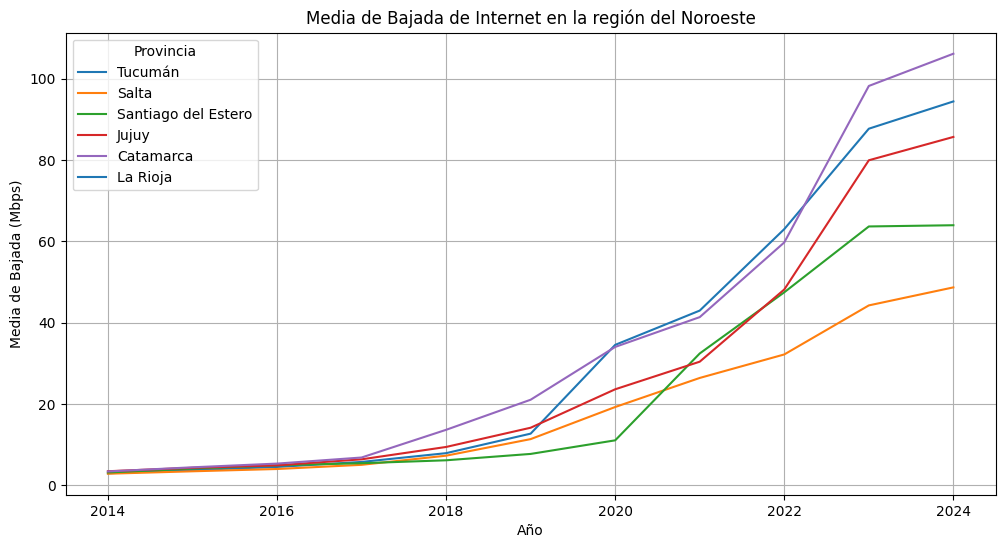

In [179]:
# Creamos un DataFrame incluyendo solamente las apariciones de la agrupación noroeste:
vel_noroeste = vel_prov[vel_prov['Provincia'].isin(noroeste)]

# Definimos el tamaño de la visualización:
plt.figure(figsize=(12, 6))

# Definimos el tipo de grafico a utilizar y los parametros sobre los cuales se generará el mismo:
sns.lineplot(x='Año', y='Mbps (Media de bajada)', data=vel_noroeste, hue='Provincia', ci=None, color='green')

# Configuraramos el panel con la guía de colores y nombres:
plt.legend(title='Provincia', labels=noroeste)

# Configuramos los títulos:
plt.title('Media de Bajada de Internet en la región del Noroeste')
plt.xlabel('Año')
plt.ylabel('Media de Bajada (Mbps)')

# Mantenemos el grid:
plt.grid(True)

# Mostramos el gráfico
plt.show()

In [180]:
# Creamos el DataFrame que contiene las apariciones más actuales para el noroeste:
vel_noroeste_2t_2024 = vel_noroeste[(vel_noroeste['Año'] == 2024) & (vel_noroeste['Trimestre'] == 2)]

# Calculamos el promedio y la desviación estándar de la velocidad de bajada (Mbps) más actuales:
prom_vel_noroeste = vel_noroeste_2t_2024['Mbps (Media de bajada)'].mean()
std_vel_noroeste = vel_noroeste_2t_2024['Mbps (Media de bajada)'].std()

# Mostramos los resultados
print(f'El promedio de la velocidad el último trimestre de 2024 para la región del Noroeste: {prom_vel_litoral} Mbps')
print(f'Y su desvíacion estandar de {std_vel_noroeste}')

El promedio de la velocidad el último trimestre de 2024 para la región del Noroeste: 99.05333333333333 Mbps
Y su desvíacion estandar de 24.153282385630327


La región **Noroeste** presenta una gran variabilidad; todas sus provincias muestran un crecimiento significativo, aunque con diferentes niveles de intensidad. Actualmente, algunas provincias superan la media, mientras que otras se mantienen por debajo de ella.

**<h4>Región Patagonica</h4>**

C:\Users\Julia\AppData\Local\Temp\ipykernel_17980\61428650.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Año', y='Mbps (Media de bajada)', data=vel_patagonia, hue='Provincia', ci=None, color='green')


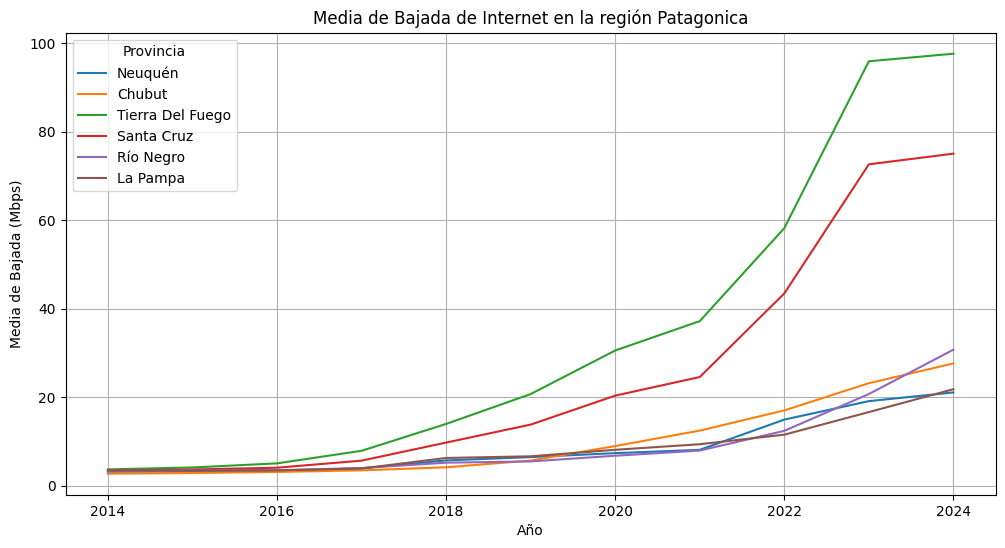

In [181]:
# Creamos un DataFrame incluyendo solamente las apariciones de la agrupación patagonia:
vel_patagonia = vel_prov[vel_prov['Provincia'].isin(patagonia)]

# Definimos el tamaño de la visualización:
plt.figure(figsize=(12, 6))

# Definimos el tipo de grafico a utilizar y los parametros sobre los cuales se generará el mismo:
sns.lineplot(x='Año', y='Mbps (Media de bajada)', data=vel_patagonia, hue='Provincia', ci=None, color='green')

# Configuraramos el panel con la guía de colores y nombres:
plt.legend(title='Provincia', labels=patagonia)

# Configuramos los títulos:
plt.title('Media de Bajada de Internet en la región Patagonica')
plt.xlabel('Año')
plt.ylabel('Media de Bajada (Mbps)')

# Mantenemos el grid:
plt.grid(True)

# Mostramos el gráfico
plt.show()

In [ ]:
# Creamos el DataFrame que contiene las apariciones más actuales para la patagonia:
vel_patagonia_2t_2024 = vel_patagonia[(vel_patagonia['Año'] == 2024) & (vel_patagonia['Trimestre'] == 2)]

# Calculamos el promedio y la desviación estándar de la velocidad de bajada (Mbps) más actuales:
prom_vel_patagonia = vel_patagonia_2t_2024['Mbps (Media de bajada)'].mean()
std_vel_patagonia = vel_patagonia_2t_2024['Mbps (Media de bajada)'].std()

# Mostramos los resultados
print(f'El promedio de la velocidad el último trimestre de 2024 para la región Patagonica: {prom_vel_patagonia} Mbps')
print(f'Y su desvíacion estandar de {std_vel_patagonia}')

El promedio de la velocidad el último trimestre de 2024 para la región Patagonica: 45.745 Mbps
Y su desvíacion estandar de 32.15591998372928


La región **Patagónica** es la más dispar del país. Aunque **Tierra del Fuego** se encuentra ligeramente por encima de la media, el resto de las provincias no superan este umbral, registrando las velocidades medias más bajas del país, por debajo de los 25 Mbps. Además, su crecimiento en velocidad de conexión es notablemente limitado, lo que refleja una evolución mucho más lenta en comparación con otras regiones.

<h5>Observaciones Finales</h5>

<ul style="padding: 0; list-style-position: inside;">
  <li style="margin-bottom: 10px; padding-left: 20px;"><b>Capital Federal</b>, <b>San Luis</b> y <b>Buenos Aires</b> destacan por tener velocidades muy altas y un crecimiento considerable año tras año en comparación con el resto del país.</li>
  <li style="margin-bottom: 10px; padding-left: 20px;">La zona del <b>Litoral</b> es la región más estable en términos de crecimiento, manteniéndose cercana a la media nacional tanto en velocidad como en evolución.</li>
  <li style="margin-bottom: 10px; padding-left: 20px;"><b>La Patagonia</b> es la región con más provincias que presentan un crecimiento reducido y las medias de velocidad más bajas del país, lo que hace urgente una mejora en cuanto a la velocidad en esta área.</li>
</ul>






### Objetivo: 
Aumentar la velocidad promedio de la región sur (Patagonia) hasta alcanzar la media nacional de Mbps a finales de 2024.

Luego de analizar las velocidades de internet en las distintas regiones de Argentina, el objetivo es incrementar la velocidad promedio de las provincias patagónicas en un porcentaje que refleje el avance hacia la media nacional de Mbps para finales de 2024. Este KPI mide el progreso hacia ese objetivo.

### Fórmula del KPI:
El KPI que utilizaremos para evaluar el avance es el siguiente:

$$
KPI = \left( \frac{\text{Mbps Sur Actual} - \text{Mbps Nacional Actual}}{\text{Mbps Nacional Objetivo} - \text{Mbps Nacional Actual}} \right) \times 100
$$


In [ ]:
vel_prov['Mbps (Media de bajada)'] = vel_prov['Mbps (Media de bajada)'].round(2)

In [ ]:
vel_prov.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,2,Buenos Aires,157.41
1,2024,2,Capital Federal,233.01
2,2024,2,Catamarca,97.38
3,2024,2,Chaco,107.76
4,2024,2,Chubut,21.67


**<h4>Análisis de las tecnologías utilizadas en Argentina</h4>**   

In [ ]:
# Cargamos el archivo acc_tec, y lo alojamos como DataFrame en la variable acc_tec
acc_tec = pd.read_csv('../data/acc_tec.csv')

In [ ]:
# Confirmamos la garga
acc_tec.head(3)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0


Procedemos a ver el porcentaje de las tecnologías de internet en Argentina

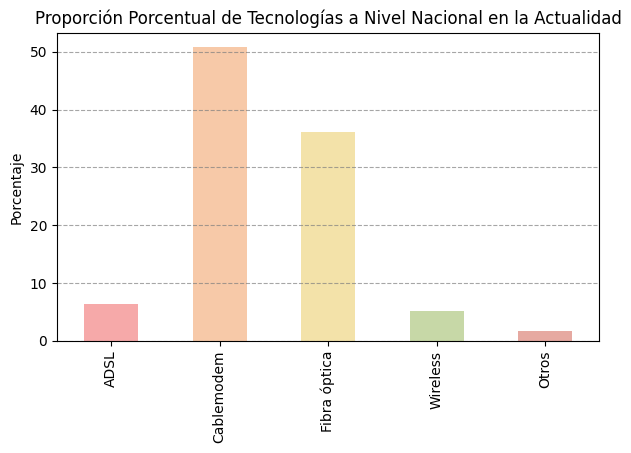

In [ ]:
# Filtramos los datos para el año 2024 y el trimestre 2:
acc_tec_2024t2 = acc_tec[(acc_tec['Año'] == 2024) & (acc_tec['Trimestre'] == 2)]

# Sumamos los valores de cada tecnología a nivel nacional para el trimestre 2:
total_cada_tecnologia = acc_tec_2024t2[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Sumamos el total general de conexiones para calcular el porcentaje:
total_general = acc_tec_2024t2['Total'].sum()
total_nacional_percent = (total_cada_tecnologia / total_general) * 100

# Creamos un gráfico de barras para mostrar la proporción porcentual de tecnologías a nivel nacional:
fig, ax = plt.subplots(figsize=(7, 4))

# Generamos las barras con los colores definidos:
total_nacional_percent.plot(kind='bar', stacked=True, ax=ax, color=['#f6a9a9', '#f7c9a8', '#f3e2a9', '#c7d8a7', '#e6a9a1'])

# Configuramos el título y las etiquetas del gráfico:
ax.set_title('Proporción Porcentual de Tecnologías a Nivel Nacional en la Actualidad', fontsize=12)
ax.set_ylabel('Porcentaje')

# Agregamos el grid:
ax.grid(True, which='both', axis='y', linestyle='--', color='gray', alpha=0.7)

# Mostramos el gráfico:
plt.show()


En este gráfico podemos observar que hay una gran predominancia de la tecnología **Cablemodem** seguido por **Fibra óptica** y en menor medida la tecnología **ADSL** y **Wireless** y se gaurda un lugar para otras tecnologías no especificadas

Procedemos a ver el crecimiento de las tecnologías a lo largo del tiempo

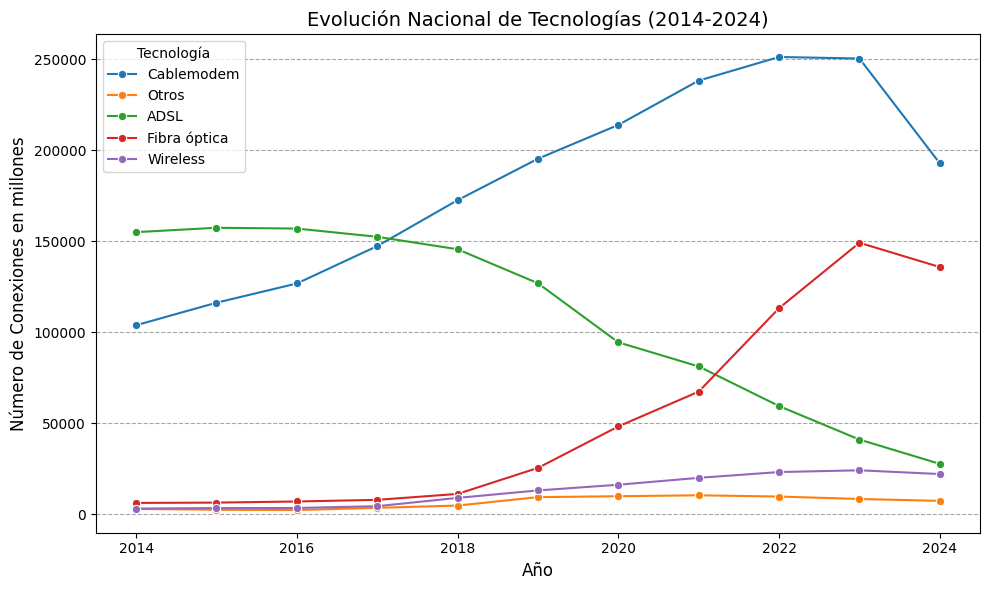

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(data=acc_tec, x='Año', y='Cablemodem', marker='o', label='Cablemodem', ax=ax, errorbar=None)
sns.lineplot(data=acc_tec, x='Año', y='Otros', marker='o', label='Otros', ax=ax, errorbar=None)
sns.lineplot(data=acc_tec, x='Año', y='ADSL', marker='o', label='ADSL', ax=ax, errorbar=None)
sns.lineplot(data=acc_tec, x='Año', y='Fibra óptica', marker='o', label='Fibra óptica', ax=ax, errorbar=None)
sns.lineplot(data=acc_tec, x='Año', y='Wireless', marker='o', label='Wireless', ax=ax, errorbar=None)

# Configurar el gráfico
ax.set_title('Evolución Nacional de Tecnologías (2014-2024)', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Número de Conexiones en millones', fontsize=12)
ax.legend(title='Tecnología')

# Agregamos el grid:
ax.grid(True, which='both', axis='y', linestyle='--', color='gray', alpha=0.7)

plt.tight_layout()
plt.show()

Luego de este grafico podemos hacer las siguientes observaciones:
- Como parametro general, podemos observar que a partir del 2023 hay una caída en el crecimiento de todas las tecnologías
Tanto el Wireless como las tecnologías no especificadas mantienen un crecimiento constante a lo largo del tiempo
- Por otro lado Adsl hace ya más de 5 años mantiene una bajada constante en ucanto a su crecimiento
- Sin tener en cuenta el último año (que se observa una bajada) podemos inferir que hay una gran crecimiento para las tecnologías Cablemodem y Fibra Optica

Ahora pasaremos a ver el caso especifico de Capital Federal ya que, como fuimos viendo, se mantiene como la región con los mejores indicadores en todos los parametros

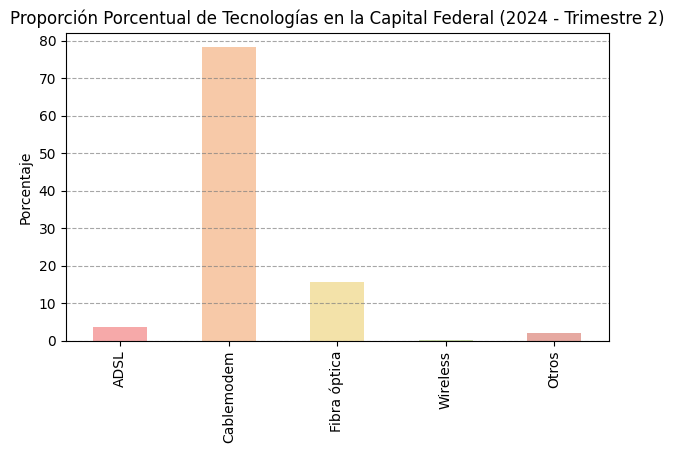

In [ ]:
# Filtramos los datos para el año 2024, el trimestre 2 y la Capital Federal (o el nombre correcto de la provincia):
acc_tec_caba_2024t2 = acc_tec[(acc_tec['Año'] == 2024) & (acc_tec['Trimestre'] == 2) & (acc_tec['Provincia'] == 'Capital Federal')]

# Sumamos los valores de cada tecnología a nivel de la Capital Federal para el trimestre 2:
total_cada_tecnologia_caba = acc_tec_caba_2024t2[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Sumamos el total general de conexiones para calcular el porcentaje:
total_general_caba = acc_tec_caba_2024t2['Total'].sum()
total_nacional_percent_caba = (total_cada_tecnologia_caba / total_general_caba) * 100

# Creamos un gráfico de barras para mostrar la proporción porcentual de tecnologías a nivel de la Capital Federal:
fig, ax = plt.subplots(figsize=(7, 4))

# Generamos las barras con los colores definidos:
total_nacional_percent_caba.plot(kind='bar', stacked=True, ax=ax, color=['#f6a9a9', '#f7c9a8', '#f3e2a9', '#c7d8a7', '#e6a9a1'])

# Configuramos el título y las etiquetas del gráfico:
ax.set_title('Proporción Porcentual de Tecnologías en la Capital Federal (2024 - Trimestre 2)', fontsize=12)
ax.set_ylabel('Porcentaje')

# Agregamos el grid:
ax.grid(True, which='both', axis='y', linestyle='--', color='gray', alpha=0.7)

# Mostramos el gráfico:
plt.show()


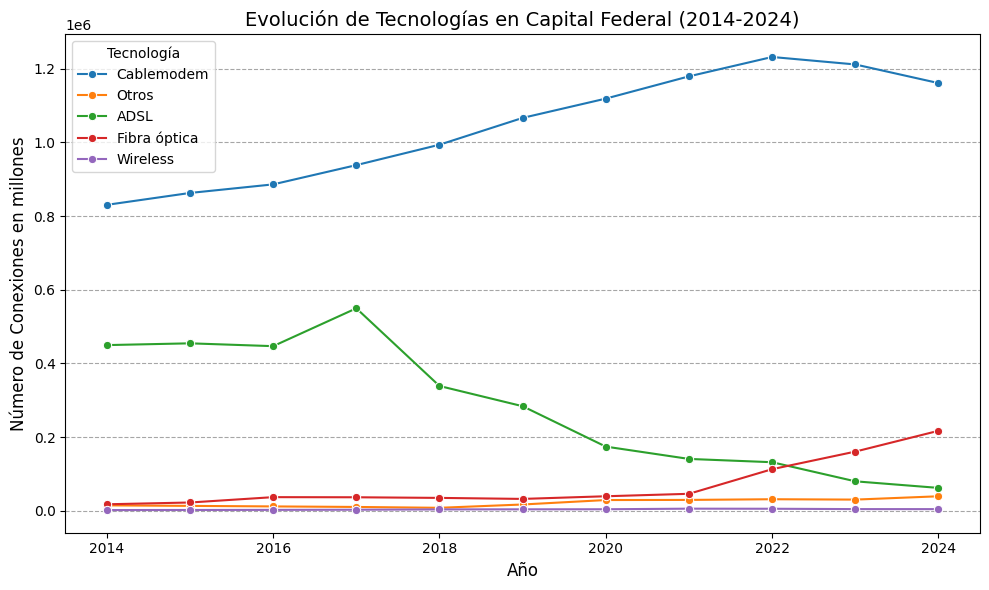

In [ ]:
# Filtramos los datos para Capital Federal
acc_tec_capital_federal = acc_tec[acc_tec['Provincia'] == 'Capital Federal']

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(data=acc_tec_capital_federal, x='Año', y='Cablemodem', marker='o', label='Cablemodem', ax=ax, errorbar=None)
sns.lineplot(data=acc_tec_capital_federal, x='Año', y='Otros', marker='o', label='Otros', ax=ax, errorbar=None)
sns.lineplot(data=acc_tec_capital_federal, x='Año', y='ADSL', marker='o', label='ADSL', ax=ax, errorbar=None)
sns.lineplot(data=acc_tec_capital_federal, x='Año', y='Fibra óptica', marker='o', label='Fibra óptica', ax=ax, errorbar=None)
sns.lineplot(data=acc_tec_capital_federal, x='Año', y='Wireless', marker='o', label='Wireless', ax=ax, errorbar=None)

# Configurar el gráfico
ax.set_title('Evolución de Tecnologías en Capital Federal (2014-2024)', fontsize=14)
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Número de Conexiones en millones', fontsize=12)
ax.legend(title='Tecnología')

# Agregamos el grid:
ax.grid(True, which='both', axis='y', linestyle='--', color='gray', alpha=0.7)

plt.tight_layout()
plt.show()


Podemos observar que no difiere mucho del caso nacional pero si podemos observar que la fibra óptica parte desde un punto muy bajo

Teniendo en cuenta que Capital Federal posee la mayor cantidad de accesos por hogares y la mayor velocidad, es consecuente a esto que la fibra óptica al ser la más adecuada para la demanda de accesos y Mbps tenga un crecimiento más pronunciado en los proximos años.

Por ello, proponemos como objetivo el crecimiento de fibra óptica en la Capital Federal que finalice con un **15%** más conexiones. El objetivo es aumentar la cantidad de conexiones de fibra óptica en un 15% respecto al valor actual.

El KPI que utilizaremos para medir este objetivo es el siguiente:

$$
KPI = \left( \frac{\text{Fibra Óptica (Nueva)} - \text{Fibra Óptica (Actual)}}{\text{Fibra Óptica (Actual)}} \right) \times 100
$$

La fórmula calcula el porcentaje de incremento en la cantidad de conexiones de fibra óptica. El objetivo es que este valor sea igual o mayor al **15%**, lo cual indicaría que hemos alcanzado el objetivo de crecimiento.


In [ ]:
acc_tec.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0
3,2024,2,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0
4,2024,2,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0


In [ ]:
kpi_acc_tec = acc_tec[['Año', 'Trimestre', 'Fibra óptica', 'Provincia']]

In [ ]:
# Filtrar el DataFrame para obtener solo las filas donde el año sea 2024
# Filtrar el DataFrame para obtener solo las filas donde el año sea 2024 y la provincia sea 'Capital Federal'
#kpi_acc_tec = kpi_acc_tec[(kpi_acc_tec['Año'] == 2024) & (kpi_acc_tec['Provincia'] == 'Capital Federal')]

# Ahora 'kpi_acc_tec_2024_cf' contiene solo las filas donde el Año es 2024 y la Provincia es 'Capital Federal'


In [ ]:
# Convertir la columna 'Fibra óptica' a enteros
kpi_acc_tec['Fibra óptica'] = kpi_acc_tec['Fibra óptica'].astype(int)

# Ahora 'kpi_acc_tec' tiene los valores de la columna 'Fibra óptica' sin el '.0'


C:\Users\Julia\AppData\Local\Temp\ipykernel_17980\1144713128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kpi_acc_tec['Fibra óptica'] = kpi_acc_tec['Fibra óptica'].astype(int)


In [ ]:
kpi_acc_tec.to_csv('../kpi/kpi_acc_tec.csv', index=False)